Filter ERA5 just for station locations

In [1]:
import xarray as xr

In [2]:
# GESLA dataset
file_path = "/Users/lb962/Downloads/ESL/GESLA/data/processed/GESLA/interim/GESLA3_NorthSeaShort.nc"
# Open the dataset
GESLA_ns_dataset = xr.open_dataset(file_path)

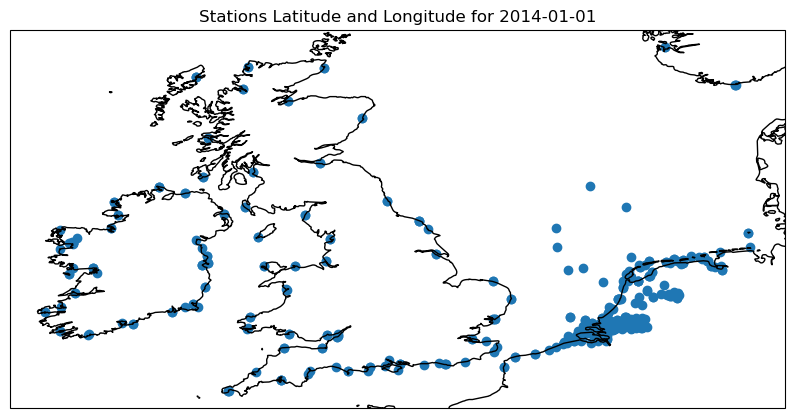

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Choose a specific date
chosen_date = '2014-01-01'  # Change this to your desired date

# Select data for the chosen date
filtered_ds_chosen_date = GESLA_ns_dataset.sel(date_time=chosen_date)

# Create a Cartopy plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot latitude and longitude of stations for the chosen date
plt.scatter(filtered_ds_chosen_date.longitude, filtered_ds_chosen_date.latitude, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'Stations Latitude and Longitude for {chosen_date}')

plt.show()

In [4]:
# Filter dataset for the year 2014
filtered_ds = GESLA_ns_dataset.sel(date_time=(GESLA_ns_dataset['date_time'].dt.year == 2014))

In [5]:
import pandas as pd
# Filter dataset for the time range from 2005 to 2014
start_date = pd.Timestamp('2005-01-01')
end_date = pd.Timestamp('2014-12-31')
filtered_ds = GESLA_ns_dataset.sel(date_time=slice(start_date, end_date))

In [6]:
import numpy as np
# Assuming ns_data is your xarray Dataset
sea_level = filtered_ds["sea_level"]

# Set sea level values to NaN where they are below -1 or above 15
sea_level_filtered = sea_level.where((sea_level > -1) & (sea_level < 15), np.nan)
filtered_ds["q_sea_level"] = sea_level_filtered

GESLA_df = filtered_ds[["q_sea_level", "station", "latitude", "longitude"]].to_dataframe().reset_index()

In [7]:
GESLA_df = GESLA_df.dropna()

In [9]:
import numpy as np

# Round latitude and longitude values to the nearest 0.5 degree
GESLA_df['lon_grid'] = np.round(GESLA_df['longitude'] * 2) / 2
GESLA_df['lat_grid'] = np.round(GESLA_df['latitude'] * 2) / 2
GESLA_df

,station,date_time,q_sea_level,latitude,longitude,lon_grid,lat_grid
0,0,2005-01-01 00:00:00,2.314,50.102000,-5.5420,-5.5,50.0
9,0,2005-01-01 01:00:00,1.723,50.102000,-5.5420,-5.5,50.0
18,0,2005-01-01 02:00:00,1.485,50.102000,-5.5420,-5.5,50.0
27,0,2005-01-01 03:00:00,1.666,50.102000,-5.5420,-5.5,50.0
36,0,2005-01-01 04:00:00,2.245,50.102000,-5.5420,-5.5,50.0
...,...,...,...,...,...,...,...
608340069,373,2014-12-27 02:00:00,1.320,53.584999,-6.1081,-6.0,53.5
608340086,373,2014-12-27 03:00:00,1.488,53.584999,-6.1081,-6.0,53.5
608340103,373,2014-12-27 04:00:00,1.204,53.584999,-6.1081,-6.0,53.5
608340120,373,2014-12-27 05:00:00,0.469,53.584999,-6.1081,-6.0,53.5


In [4]:
input_file = "/Users/lb962/Downloads/ESL/GESLA/data/ERA5hourly/ERA52014.nc"
ds = xr.open_dataset(input_file)

#lon_values = ds['longitude'].values
#lat_values = ds['latitude'].values

In [5]:
# Convert xarray Dataset to pandas DataFrame
ds_df = ds.to_dataframe().reset_index()

In [22]:
ds_df.columns

Index(['longitude', 'latitude', 'time', 'u10', 'v10', 'mdts', 'mpts', 'mwd',
       'mwp', 'sst', 'shts', 'shww', 'sp'],
      dtype='object')

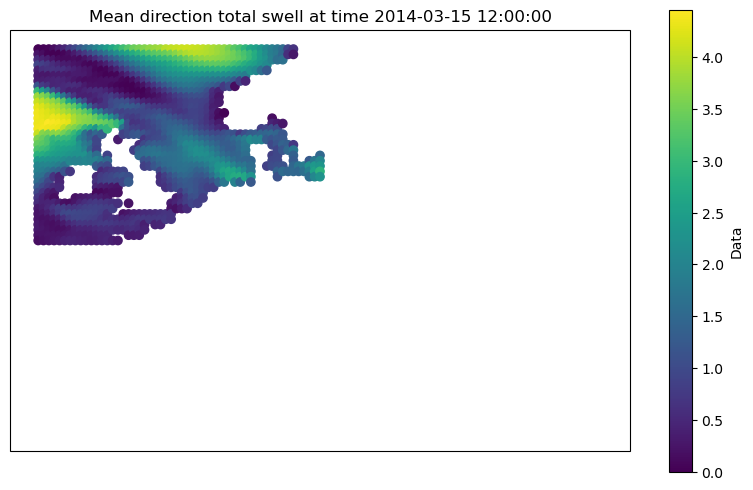

In [29]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming ds_df contains columns 'longitude', 'latitude', 'time', and 'sst' for visualization
# Replace 'specific_time' with the specific time you want to plot
specific_time = '2014-03-15 12:00:00'  

# Filter ds_df for the specific time
specific_time_data = ds_df[ds_df['time'] == specific_time]

# Plotting the data
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Scatter plot of the data
plt.scatter(specific_time_data['longitude'], specific_time_data['latitude'], c=specific_time_data['shww'], cmap='viridis')

# Add Cartopy land on top
#ax.add_feature(cfeature.LAND, color='lightgray')

# Add Cartopy coastline outline on top
#ax.add_feature(cfeature.COASTLINE, edgecolor='black')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean direction total swell at time {}'.format(specific_time))
plt.colorbar(label='Data')
plt.grid(True)
plt.show()



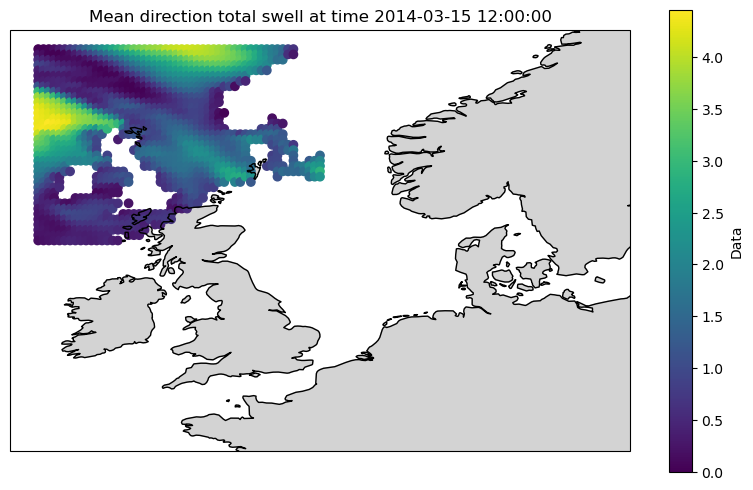

In [28]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming ds_df contains columns 'longitude', 'latitude', 'time', and 'sst' for visualization
# Replace 'specific_time' with the specific time you want to plot
specific_time = '2014-03-15 12:00:00'  

# Filter ds_df for the specific time
specific_time_data = ds_df[ds_df['time'] == specific_time]

# Plotting the data
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Scatter plot of the data
plt.scatter(specific_time_data['longitude'], specific_time_data['latitude'], c=specific_time_data['shww'], cmap='viridis')

# Add Cartopy land on top
ax.add_feature(cfeature.LAND, color='lightgray')

# Add Cartopy coastline outline on top
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean direction total swell at time {}'.format(specific_time))
plt.colorbar(label='Data')
plt.grid(True)
plt.show()



In [8]:
ds_df.columns

Index(['longitude', 'latitude', 'time', 'u10', 'v10', 'mdts', 'mpts', 'mwd',
       'mwp', 'sst', 'shts', 'shww', 'sp'],
      dtype='object')

In [12]:
import matplotlib.pyplot as plt

# Assuming ds_df contains columns 'longitude', 'latitude', 'time', and 'data' for visualization
# Replace 'specific_time' with the specific time you want to plot
specific_time = '2014-03-15 12:00:00'  

# Filter ds_df for the specific time
specific_time_data = ds_df[ds_df['time'] == specific_time]

# Plot land
plt.figure(figsize=(10, 6))
plt.scatter(ds_df['longitude'], ds_df['latitude'], c='lightgray', marker='s', label='Land')

# Plotting the data
plt.scatter(specific_time_data['longitude'], specific_time_data['latitude'], c=specific_time_data['u10'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('u10 at time: {}'.format(specific_time))
plt.colorbar(label='Data')
plt.legend()
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [17]:
from sklearn.neighbors import NearestNeighbors

# Rename columns in ds_df
ds_df = ds_df.rename(columns={'latitude': 'lat_grid', 'longitude': 'lon_grid'})

# Initialize the NearestNeighbors model with the desired number of neighbors
n_neighbors = 1  # Find the closest point
nn_model = NearestNeighbors(n_neighbors=n_neighbors, algorithm='kd_tree').fit(ds_df[['lat_grid', 'lon_grid']])

# Query the nearest neighbors for each point in GESLA_df
distances, indices = nn_model.kneighbors(GESLA_df[['lat_grid', 'lon_grid']])

# Create a DataFrame to store the merged data
merged_df = pd.concat([GESLA_df, ds_df.iloc[indices[:, 0]].reset_index(drop=True)], axis=1)

# Now merged_df contains the merged data, where each row corresponds to the closest point in ds_df for each point in GESLA_df

In [14]:
import pandas as pd
from scipy.spatial.distance import cdist

# Assuming GESLA_df contains columns 'lat_grid', 'lon_grid', and 'date_time'
# Assuming ds_df contains columns 'latitude', 'longitude', 'time', and 'data'

# Create an empty DataFrame to store the merged data
merged_df = pd.DataFrame()

# Iterate through each row in GESLA_df
for index, row in GESLA_df.iterrows():
    lat = row['lat_grid']
    lon = row['lon_grid']
    # Calculate distances between the current point in GESLA_df and all points in ds_df
    distances = cdist([[lat, lon]], ds_df[['latitude', 'longitude']])
    # Find the index of the closest point in ds_df
    closest_index = distances.argmin()
    # Extract the corresponding row from ds_df
    closest_row = ds_df.iloc[closest_index]
    # Merge the two rows
    merged_row = pd.concat([row, closest_row])
    # Append the merged row to the merged_df DataFrame
    merged_df = merged_df.append(merged_row, ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [48]:
# Merge the dataframes based on matching columns
merged_df = pd.merge(GESLA_df, ds_df, left_on=['lat_grid', 'lon_grid', 'date_time'], right_on=['latitude', 'longitude', 'time'], how='inner')

In [65]:
from scipy.spatial import cKDTree
import numpy as np

# Assuming GESLA_df contains columns 'lat_grid', 'lon_grid', and 'date_time'
# Assuming ds_df contains columns 'latitude', 'longitude', 'time', and 'data'

# Extracting the coordinates from GESLA_df
gesla_coords = GESLA_df[['lat_grid', 'lon_grid']].values

# Extracting the coordinates from ds_df
ds_coords = ds_df[['latitude', 'longitude']].values

# Building a k-d tree for ds_df coordinates
tree = cKDTree(ds_coords)

# Finding the nearest neighbor in ds_df for each point in GESLA_df
distances, indices = tree.query(gesla_coords, k=1)

# Adding the nearest neighbor data to GESLA_df
GESLA_df['nearest_latitude'] = ds_df.loc[indices, 'latitude'].values
GESLA_df['nearest_longitude'] = ds_df.loc[indices, 'longitude'].values
GESLA_df['nearest_time'] = ds_df.loc[indices, 'time'].values
GESLA_df['nearest_data'] = ds_df.loc[indices, 'data'].values

In [50]:
kijk = merged_df.dropna()

In [26]:
input_file = "/Users/lb962/Downloads/ESL/GESLA/data/ERA5hourly/ERA52014.nc"
ds = xr.open_dataset(input_file)

#lon_values = ds['longitude'].values
#lat_values = ds['latitude'].values

In [27]:
ds

KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt: 


<xarray.Dataset>
Dimensions:    (longitude: 107, latitude: 73, time: 8760)
Coordinates:
  * longitude  (longitude) float32 -11.5 -11.25 -11.0 -10.75 ... 14.5 14.75 15.0
  * latitude   (latitude) float32 66.0 65.75 65.5 65.25 ... 48.5 48.25 48.0
  * time       (time) datetime64[ns] 2014-01-01 ... 2014-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    mdts       (time, latitude, longitude) float32 ...
    mpts       (time, latitude, longitude) float32 ...
    mwd        (time, latitude, longitude) float32 ...
    mwp        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
    shts       (time, latitude, longitude) float32 ...
    shww       (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-27 01:26:39 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

## Filter ERA5 data for coastline

In [2]:
import geopandas as gpd
from shapely.geometry import LineString

# Load coastline shapefile
coastline = gpd.read_file('/Users/lb962/Downloads/ESL/GESLA/data/Europe_coastline_shapefile (1)/Europe_coastline.shp')

# Define the projection
crs_etrs89 = "EPSG:3035"
crs_wgs84 = "EPSG:4326"

# Transform the coastline GeoDataFrame to longitude and latitude
coastline.to_crs(crs_wgs84, inplace=True)

# Define the longitude and latitude range for Europe
lon_min, lon_max = -11.5, 15.0  # Longitude range for Europe
lat_min, lat_max = 48, 65.0   # Latitude range for Europe

# Filter coastline points within the specified longitude and latitude range
coastline = coastline.cx[lon_min:lon_max, lat_min:lat_max]

# Define the interpolation interval range (in meters)
min_interval = 0.01  # Minimum interpolation interval
max_interval = 0.1  # Maximum interpolation interval

# Function to calculate adaptive interpolation interval based on segment length or curvature
def adaptive_interval(segment):
    segment_length = segment.length
    # Calculate curvature (ratio of segment length to chord length)
    chord_length = segment.distance(LineString([segment.coords[0], segment.coords[-1]]))
    curvature = segment_length / chord_length if chord_length != 0 else 0
    # Define a function to map curvature to interpolation interval within the specified range
    # Here, we use a simple linear mapping, but you can adjust this as needed
    mapped_interval = min_interval + (max_interval - min_interval) * (1 - curvature)
    # Ensure the interval is within the specified range
    return max(min(mapped_interval, max_interval), min_interval)

# Function to interpolate points along a line segment with adaptive interval
def interpolate_segment_adaptive(segment):
    # Calculate the adaptive interpolation interval for the segment
    interval = adaptive_interval(segment)
    # Calculate the number of interpolation points for the segment
    num_points = int(segment.length / interval) + 1
    # Interpolate points along the segment at adaptive intervals
    interpolated_points = [segment.interpolate(i * interval) for i in range(num_points)]
    return interpolated_points

# Interpolate points along each line segment of the MULTILINESTRING using adaptive interval
coastline_points_adaptive = []
for line in coastline.geometry:
    if line.geom_type == 'LineString':
        # If the geometry is a LineString, interpolate points along it
        coastline_points_adaptive.extend(interpolate_segment_adaptive(line))
    elif line.geom_type == 'MultiLineString':
        # If the geometry is a MultiLineString, iterate over its components and interpolate points along each segment
        for segment in line.geoms:
            coastline_points_adaptive.extend(interpolate_segment_adaptive(segment))

# Convert the coastline points to a GeoSeries
coastline_points = gpd.GeoSeries(coastline_points_adaptive)

# Filter the GeoSeries for points within the specified bounding box
coastline_points = coastline_points.cx[lon_min:lon_max, lat_min:lat_max]

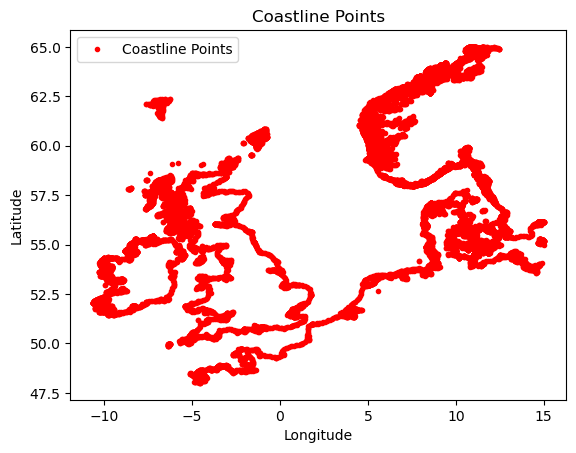

In [3]:
import matplotlib.pyplot as plt


# Plot coastline points
plt.plot(coastline_points.x, coastline_points.y, 'r.', label='Coastline Points')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Coastline Points')
plt.legend()

# Show the plot
plt.show()

In [4]:
import numpy as np

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    R = 6371  # Radius of the earth in km
    dlon = np.radians(lon2) - np.radians(lon1)
    dlat = np.radians(lat2) - np.radians(lat1)
    a = np.sin(dlat/2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    return distance

# Assuming coastline_lon and coastline_lat are arrays representing the longitude and latitude of the coastline points
# Assuming ds is your xarray Dataset with longitude and latitude variables
# Assuming threshold_distance is the maximum distance to consider a point close enough to the coastline
# Calculate squared differences between each point in the dataset and each coastline point
lon_diff = ds.longitude.values[:, np.newaxis] - coastline_lon[np.newaxis, :]
lat_diff = ds.latitude.values[:, np.newaxis] - coastline_lat[np.newaxis, :]

# Expand dimensions of latitude and longitude arrays to make them compatible for broadcasting
lon_expanded = np.expand_dims(ds.longitude.values, axis=1)
lat_expanded = np.expand_dims(ds.latitude.values, axis=0)

# Expand dimensions of coastline latitude to match the shape of lat_expanded
coastline_lat_expanded = np.expand_dims(coastline_lat, axis=0)

# Calculate squared differences
lon_diff_sq = (lon_expanded - coastline_lon)**2
lat_diff_sq = (lat_expanded - coastline_lat_expanded)**2

# Calculate squared distances
squared_distances_to_coastline = lon_diff_sq + lat_diff_sq


# Find indices of points close to the coastline
indices_close_to_coastline = np.where(np.any(squared_distances_to_coastline < threshold_distance**2, axis=1))[0]

# Filter out points that are not close enough to the coastline
ds_filtered = ds.isel(points=indices_close_to_coastline)


NameError: name 'ds' is not defined

In [49]:
import xarray as xr
from shapely.geometry import Polygon, Point

# Assuming coastline_points is a GeoSeries containing Point geometries
# Replace coastline_points with your actual GeoSeries
coastline_polygon = Polygon(coastline_points)

# Assuming your dataset is an xarray Dataset with latitude and longitude variables
# Replace ds with your actual Dataset
ds_with_coords = ds.assign_coords(geometry=[Point(lon, lat) for lon, lat in zip(ds.longitude.values, ds.latitude.values)])

# Apply the coastline polygon to the coordinates
ds_filtered = ds_with_coords.where([coastline_polygon.contains(point) for point in ds_with_coords.geometry], drop=True)

# Now ds_filtered contains only points that fall within the coastline polygon


TypeError: operand type(s) all returned NotImplemented from __array_ufunc__(<ufunc 'contains'>, '__call__', <POLYGON ((-4.56 48.001, -4.647 48.023, -4.837 48.03, -4.846 48.032, -4.846 ...>, <xarray.DataArray 'geometry' ()>
array(<POINT (-11.5 66)>, dtype=object)
Coordinates:
    geometry  object POINT (-11.5 66)): 'Polygon', 'DataArray'

In [5]:
import xarray as xr
import numpy as np
def process_file_ERA5(input_file, coastline_points):
    # Open the NetCDF file using xarray
    ds = xr.open_dataset(input_file)

    # Rename station_y_coordinate to latitude and station_x_coordinate to longitude
    ds = ds.rename({'station_y_coordinate': 'latitude', 'station_x_coordinate': 'longitude'})

    # Extract longitude and latitude coordinates
    lon_values = ds['longitude'].values
    lat_values = ds['latitude'].values

    # Define the longitude and latitude range for Europe
    #lon_min, lon_max = -11.5, 35.0  # Longitude range for Europe
    #lat_min, lat_max = 29.5, 71.0   # Latitude range for Europe

    # Define the longitude and latitude range for Europe
    lon_min, lon_max = -11.5, 15.0  # Longitude range for Europe
    lat_min, lat_max = 48, 65.0   # Latitude range for Europe

    # Boolean indexing to select the desired range
    selected_indices = (lon_values >= lon_min) & (lon_values <= lon_max) & (lat_values >= lat_min) & (lat_values <= lat_max)
    selected_data = ds.isel(stations=selected_indices)

    # Extract longitude and latitude coordinates for selected data
    #lon_selected = selected_data['longitude'].values
    #lat_selected = selected_data['latitude'].values
    
    # Create arrays for longitude and latitude coordinates of coastline points
    coastline_lon = coastline_points.x.values
    coastline_lat = coastline_points.y.values

    # Get longitude and latitude values from the xarray dataset
    lon_values = selected_data['longitude'].values
    lat_values = selected_data['latitude'].values

    # Repeat coastline coordinates to match the shape of lon_values and lat_values
    coastline_lon_rep = np.repeat(coastline_lon[:, np.newaxis], len(lon_values), axis=1)
    coastline_lat_rep = np.repeat(coastline_lat[:, np.newaxis], len(lat_values), axis=1)

    # Calculate distances between each point in the dataset and each coastline point
    distances = np.sqrt((lon_values - coastline_lon_rep)**2 + (lat_values - coastline_lat_rep)**2)

    # Find the minimum distance for each point in the dataset
    min_distances = np.min(distances, axis=0)

    # Define a threshold distance within which points are considered close to the coastline
    threshold_distance = 0.05  # Adjust as needed 0.05

    # Create a mask to select points close to the coastline
    coastline_mask = min_distances < threshold_distance

    # Use the mask to select coastline points in the original dataset
    coastline_data = selected_data.isel(stations=coastline_mask)
    #ds_hourly = coastline_data.resample(time='1H').mean()
    return coastline_data

In [16]:
coastline_lat_rep.shape

(28997, 73)

In [6]:
input_file = "/Users/lb962/Downloads/ESL/GESLA/data/ERA5hourly/ERA52014.nc"
ds = xr.open_dataset(input_file)

lon_values = ds['longitude'].values
lat_values = ds['latitude'].values

# Create arrays for longitude and latitude coordinates of coastline points
coastline_lon = coastline_points.x.values
coastline_lat = coastline_points.y.values

# Get longitude and latitude values from the xarray dataset
lon_values = ds['longitude'].values
lat_values = ds['latitude'].values

In [7]:
import numpy as np

# Haversine formula to calculate distances
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2[:, np.newaxis] - lon1
    dlat = lat2[:, np.newaxis] - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2[:, np.newaxis]) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

# Threshold distance in kilometers
threshold_distance_km = 50

# Calculate distances from each point in ds dataset to the coastline
distances_to_coastline = haversine(ds.longitude.values, ds.latitude.values, coastline_lon, coastline_lat)

# Find indices of points close to the coastline
indices_close_to_coastline = np.where(np.any(distances_to_coastline < threshold_distance_km, axis=0))[0]

# Select variables from ds based on the indices
selected_ds = ds.isel(points=indices_close_to_coastline)


ValueError: operands could not be broadcast together with shapes (28997,73) (28997,107) 

In [64]:
input_file = "/Users/lb962/Downloads/ESL/GESLA/data/ERA5hourly/ERA52014.nc"
ds = xr.open_dataset(input_file)

lon_values = ds['longitude'].values
lat_values = ds['latitude'].values

# Create arrays for longitude and latitude coordinates of coastline points
coastline_lon = coastline_points.x.values
coastline_lat = coastline_points.y.values

# Get longitude and latitude values from the xarray dataset
lon_values = ds['longitude'].values
lat_values = ds['latitude'].values

# Repeat coastline coordinates to match the shape of lon_values and lat_values
coastline_lon_rep = np.repeat(coastline_lon[:, np.newaxis], len(lon_values), axis=1)
coastline_lat_rep = np.repeat(coastline_lat[:, np.newaxis], len(lat_values), axis=1)

print(lon_values.shape)
print(coastline_lon_rep.shape)

print(lat_values.shape)
print(coastline_lon_rep.shape)

(107,)
(28997, 107)


In [69]:
# Create arrays for longitude and latitude coordinates of coastline points
coastline_lon = coastline_points.x.values
coastline_lat = coastline_points.y.values

# Get longitude and latitude values from the xarray dataset
lon_values = ds['longitude'].values
lat_values = ds['latitude'].values

# Expand coastline coordinates to match the shape of lon_values and lat_values
coastline_lon_expanded = np.expand_dims(coastline_lon, axis=1)
coastline_lat_expanded = np.expand_dims(coastline_lat, axis=1)

# Calculate differences in longitude and latitude
lon_diff = lon_values - coastline_lon_expanded
lat_diff = lat_values - coastline_lat_expanded

# Calculate squared differences
lon_diff_sq = lon_diff ** 2
lat_diff_sq = lat_diff ** 2

# Calculate squared distances
squared_distances_to_coastline = lon_diff_sq + lat_diff_sq

# Calculate Euclidean distances
distances = np.sqrt(squared_distances_to_coastline)

# Find the minimum distance for each point in the dataset
min_distances = np.min(distances, axis=1)


ValueError: operands could not be broadcast together with shapes (28997,107) (28997,73) 

In [76]:
# Calculate squared differences
lon_diff_sq = lon_diff ** 2
lat_diff_sq = lat_diff ** 2

In [79]:
import numpy as np

# Calculate the minimum number of points to align
min_points = min(lon_diff_sq.shape[1], lat_diff_sq.shape[1])

# Calculate the Euclidean distance
squared_distances_to_coastline = lon_diff_sq[:, :min_points] + lat_diff_sq[:, :min_points]
distances = np.sqrt(squared_distances_to_coastline)

# Calculate the threshold distance
threshold_distance = 0.05  # Adjust as needed

# Create a mask to select points close to the coastline
coastline_mask = np.any(distances < threshold_distance, axis=1)

# Use the mask to select coastline points in the original dataset
coastline_data = ds.isel(points=coastline_mask)


ValueError: Dimensions {'points'} do not exist. Expected one or more of Frozen({'longitude': 107, 'latitude': 73, 'time': 8760})

In [75]:
import numpy as np

# Define a threshold distance within which points are considered close to the coastline
threshold_distance = 0.05  # Adjust as needed

# Calculate distances from each point in the dataset to the coastline
distances_to_coastline = haversine(ds.longitude.values, ds.latitude.values, coastline_lon, coastline_lat)

# Find the minimum distance for each point in the dataset
min_distances = np.min(distances_to_coastline, axis=1)

# Create a mask based on whether the minimum distance satisfies the threshold condition
coastline_mask = min_distances < threshold_distance

# Use the mask to select coastline points in the original dataset
coastline_data = ds.isel(points=coastline_mask)


ValueError: operands could not be broadcast together with shapes (28997,) (107,) 

In [68]:
# Calculate distances between each point in the dataset and each coastline point
distances = np.sqrt((lon_values - coastline_lon_rep)**2 + (lat_values - coastline_lat_rep)**2)

# Find the minimum distance for each point in the dataset
min_distances = np.min(distances, axis=0)

ValueError: operands could not be broadcast together with shapes (28997,107) (28997,73) 

In [66]:
# Define a threshold distance within which points are considered close to the coastline
threshold_distance = 0.05  # Adjust as needed 0.05

# Create a mask to select points close to the coastline
coastline_mask = min_distances < threshold_distance

# Use the mask to select coastline points in the original dataset
coastline_data = ds.isel(stations=coastline_mask)

NameError: name 'min_distances' is not defined

In [43]:
import numpy as np

# Haversine formula to calculate distance between two points given their longitude and latitude
def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Earth radius in kilometers

    # Convert latitude and longitude from degrees to radians
    lon1, lat1, lon2, lat2 = np.radians(lon1), np.radians(lat1), np.radians(lon2), np.radians(lat2)

    # Reshape coastline points to match the shape of dataset points
    lon2_rep = np.repeat(lon2, lon1.shape[0]).reshape(lon2.shape[0], -1)
    lat2_rep = np.repeat(lat2, lat1.shape[0]).reshape(lat2.shape[0], -1)

    # Haversine formula
    dlon = lon2_rep - lon1
    dlat = lat2_rep - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2_rep) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c

    return distance

# Threshold distance to the coastline (in kilometers)
threshold_distance = 50  # Adjust as needed

# Calculate distances from each point in ds dataset to the coastline
distances_to_coastline = haversine(ds.longitude.values, ds.latitude.values, coastline_lon, coastline_lat)

# Find indices of points close to the coastline
indices_close_to_coastline = np.where(np.any(distances_to_coastline < threshold_distance, axis=1))[0]

# Create a new dataset containing only the points close to the coastline
ds_close_to_coastline = ds.isel(index=indices_close_to_coastline)


ValueError: operands could not be broadcast together with shapes (28997,73) (28997,107) 

In [ ]:
import os
import xarray as xr
import numpy as np

# Define the folder containing the input files
input_folder = "/Users/lb962/Downloads/ESL/GESLA/data/ERA5hourly"

# Initialize an empty list to store processed datasets
processed_datasets = []

# Iterate over each file in the input folder
for filename in os.listdir(input_folder):
    print(filename)
    if filename.endswith(".nc"):  # Process only NetCDF files
        # Construct the full path to the input file
        input_file = os.path.join(input_folder, filename)
        
        # Process the file using the defined function
        #processed_data = process_file(input_file, coastline_points)
        
        # Append the processed dataset to the list
       # processed_datasets.append(processed_data)

# Concatenate all processed datasets along the time dimension
concatenated_data = xr.concat(processed_datasets, dim='time')

In [ ]:
# Save the concatenated data to a new NetCDF file
output_file = "/Users/lb962/Downloads/ESL/GESLA/data/processed/ERA5/ERA520002014.nc"
concatenated_data.to_netcdf(output_file)